In [3]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


In [4]:
# For this notebook to run with updated APIs, we need torch 1.12+ and torchvision 0.13+
try:
    import torch
    import torchvision
    assert int(torch.__version__.split(".")[1]) >= 12 or int(torch.__version__.split(".")[0]) == 2, "torch version should be 1.12+"
    assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
    !pip3 install -U torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")

torch version: 2.9.1
torchvision version: 0.24.1


In [5]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !mv pytorch-deep-learning/helper_functions.py . # get the helper_functions.py script
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [7]:
# Download pizza, steak, sushi images from GitHub
image_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination="pizza_steak_sushi")
image_path

[INFO] data/pizza_steak_sushi directory exists, skipping download.


PosixPath('data/pizza_steak_sushi')

In [8]:
# Setup train and test paths
train_dir = image_path / "train"
test_dir = image_path / "test"

print(f"Train dir: {train_dir}")
print(f"Test dir: {test_dir}")

Train dir: data/pizza_steak_sushi/train
Test dir: data/pizza_steak_sushi/test


In [9]:
train_dir =image_path /"train"
test_dir =image_path /"test"
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [10]:
from going_modular.going_modular import data_setup
IMAGE_SIZE =224
manual_transforms = transforms.Compose([ transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),transforms.ToTensor() ])

In [11]:
from going_modular.going_modular import data_setup
from torchvision import transforms

# 1. Define the transform (Recalling the fix: Capital 'R' for Resize)
IMAGE_SIZE = 224
manual_transforms = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor()
])

# 2. Create DataLoaders using the paths you just defined
BATCH_SIZE = 32

train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transforms,
    batch_size=BATCH_SIZE
)

# 3. Check the output
print(f"Class names: {class_names}")
print(f"Train dataloader length: {len(train_dataloader)}")
print(f"Test dataloader length: {len(test_dataloader)}")

Class names: ['pizza', 'steak', 'sushi']
Train dataloader length: 8
Test dataloader length: 3


In [12]:
import shutil
from pathlib import Path
from going_modular.going_modular import data_setup # Import your custom module

# 1. Force delete the existing data folder to clear the error
data_path = Path("data/pizza_steak_sushi")
if data_path.exists():
    shutil.rmtree(data_path)
    print(f"Deleted corrupted directory: {data_path}")

# 2. Re-download the data (Copying the download function logic here to ensure it runs)
import requests
import zipfile

# Setup path to data folder
data_root = Path("data/")
image_path = data_root / "pizza_steak_sushi"
image_path.mkdir(parents=True, exist_ok=True)

# Download
with open(data_root / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading pizza, steak, sushi data...")
    f.write(request.content)

# Unzip
with zipfile.ZipFile(data_root / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi data...")
    zip_ref.extractall(image_path)

# 3. Define paths again
train_dir = image_path / "train"
test_dir = image_path / "test"

# 4. Create DataLoaders immediately to verify it works
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transforms, # Uses the transforms we fixed earlier
    batch_size=32
)

print("\nSuccess! Data loaded.")
print(f"Classes found: {class_names}")

Deleted corrupted directory: data/pizza_steak_sushi
Unzipping pizza, steak, sushi data...

Success! Data loaded.
Classes found: ['pizza', 'steak', 'sushi']


In [13]:
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transforms, # Uses the transforms we fixed earlier
    batch_size=32
)
len(train_dataloader), len(test_dataloader), class_names

(8, 3, ['pizza', 'steak', 'sushi'])

/Users/abdrhmn/myproject/0-deeplearning-pytorch/deep-learning-by-pytorch/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


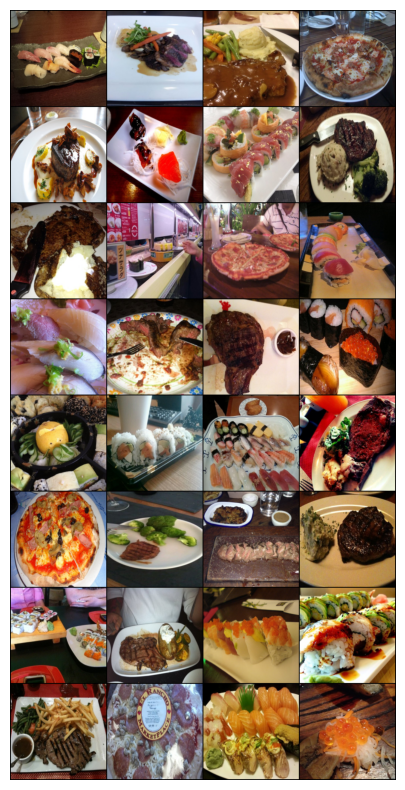

(8, 3, ['pizza', 'steak', 'sushi'])

In [14]:
#Visualize some data
import matplotlib.pyplot as plt
# Get a batch of images and labels
images, labels = next(iter(train_dataloader))
# Create a grid of images
img_grid = torchvision.utils.make_grid(images, nrow=4)
# Plot the grid
plt.figure(figsize=(10,10))
plt.imshow(img_grid.permute(1, 2, 0))  # Change from
plt.axis('off')
plt.show()  
len(train_dataloader), len(test_dataloader), class_names


In [15]:
# Set random seeds for reproducibility
set_seeds(42)

In [16]:
# Replicate the model architecture from the paper
height=224
width = 224
color_channels= 3
patch_size=16
number_of_patches=int((height*width)/patch_size**2)


In [17]:
#input_shape
embedding_layer_input_shape=(height,width,color_channels)
# output chape
embedding_layer_output_shape=(number_of_patches,patch_size**2 * color_channels)

print(f"Input shape(Single 2D image):{embedding_layer_input_shape}")
print(f"Output shape(after patching and flattening):{embedding_layer_output_shape}")

Input shape(Single 2D image):(224, 224, 3)
Output shape(after patching and flattening):(196, 768)


In [18]:
!pip install matplotlib

In [19]:
import matplotlib.pyplot as plt
plt.imshow(image.permute(1,2,0))
plt.title(class_names[label])
plt.axis(False);

image_permuted=image_permuted(1,2,0)

NameError: name 'image' is not defined

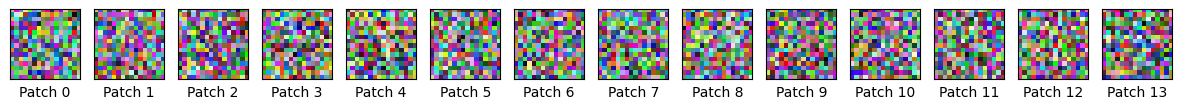

In [ ]:
import torch
import matplotlib.pyplot as plt

# 1. إعداد المتغيرات الأساسية
image_size = 224
patch_size = 16

# 2. إنشاء المتغير المفقود 'image' (تنسور عشوائي يمثل صورة)
# الأبعاد في PyTorch تكون: (القنوات اللونية، الارتفاع، العرض)
image = torch.rand(3, image_size, image_size) 

# 3. السطر الذي كان يعطيك الخطأ (الآن سيعمل لأن 'image' موجود)
# نقوم بتغيير الترتيب ليكون (الارتفاع، العرض، القنوات) ليفهمه matplotlib
image_permuted = image.permute(1, 2, 0).numpy()

# 4. باقي الكود الخاص بك
num_patches = (image_size * image_size) // (patch_size**2)
assert image_size % patch_size == 0 

# إنشاء الرسم
fig, axs = plt.subplots(nrows=1, ncols=image_size // patch_size, 
                        figsize=(15, 2), # قمت بتكبير حجم الرسم قليلاً للوضوح
                        sharex=True, sharey=True)

for i, patch in enumerate(range(0, image_size, patch_size)):
    # هنا يتم عرض المربعات القُطرية (Diagonal)
    axs[i].imshow(image_permuted[patch:patch+patch_size, patch:patch+patch_size, :])
    axs[i].set_xlabel(f"Patch {i}") # تسمية للتوضيح
    axs[i].set_xticks([]) # إخفاء الأرقام للمظهر الجمالي
    axs[i].set_yticks([])
    axs[i].imshow(image_permuted[patch:patch+patch_size, patch:patch+patch_size, :])
    axs[i].set_xlabel(f"Patch {i}") # تسمية للتوضيح
    axs[i].set_xticks([]) # إخفاء الأرقام للمظهر الجمالي
    axs[i].set_yticks([])

plt.show()

In [24]:
image_batch,label_batch= next(iter(train_dataloader))
image, label=image_batch[0], label_batch[0]
image.shape,label

/Users/abdrhmn/myproject/0-deeplearning-pytorch/deep-learning-by-pytorch/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


(torch.Size([3, 224, 224]), tensor(1))

In [ ]:
img_size=224
patch_size=16
num_patches=(img_size*img_size)//(patch_size**2)
assert img_size % patch_size ==0
#img_size,patch_size,num_patches



(224, 16, 196)

In [29]:
# Create subpolts
fig , axs =plt.subplots( nrows=img_size // patch_size,ncols=img_size // patch_size, figsize=(num_patches,num_patches),sharex=True, sharey=True)
#loop through rows and columns of subplots
for i ,patch_hight in enumerate(range(0,img_size,patch_size)):
    for j ,patch_width in enumerate(range(0,img_size,patch_size)):
        axs[i,j].imshow(image.permute(1,2,0)[patch_hight:patch_hight +patch_size, patch_width:patch_width +patch_size,:])
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])